In [1]:
import warnings;
warnings.simplefilter('ignore');
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns 

In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
data = pd.read_csv('apples.csv',on_bad_lines='skip', delimiter=";")
data.dtypes

Unnamed: 0         int64
date              object
average_price    float64
total_volume       int64
gala               int64
fuji               int64
granny_smith       int64
total_bags         int64
s_bags             int64
l_bags             int64
xl_bags            int64
type              object
region            object
dtype: object

In [3]:
plt.rcParams['figure.figsize'] = [20,15]

In [4]:
data['date'] = pd.to_datetime(data['date'])
data = data.rename(columns={'Unnamed: 0': 'Week'})
data.dtypes

Week                      int64
date             datetime64[ns]
average_price           float64
total_volume              int64
gala                      int64
fuji                      int64
granny_smith              int64
total_bags                int64
s_bags                    int64
l_bags                    int64
xl_bags                   int64
type                     object
region                   object
dtype: object

In [5]:
data2 = data.copy()
data2.head()

,Week,date,average_price,total_volume,gala,fuji,granny_smith,total_bags,s_bags,l_bags,xl_bags,type,region
0,0,2015-12-27,1.33,6423662,103674,5445485,4816,869687,860362,9325,0,conventional,Albany
1,1,2015-12-20,1.35,5487698,67428,4463881,5833,950556,940807,9749,0,conventional,Albany
2,2,2015-12-13,0.93,11822022,79470,10914967,13050,814535,804221,10314,0,conventional,Albany
3,3,2015-06-12,1.08,7899215,113200,7197641,7258,581116,567740,13376,0,conventional,Albany
4,4,2015-11-29,1.28,5103960,94148,4383839,7578,618395,598626,19769,0,conventional,Albany


In [6]:

# filtering data
#data2 =  data2.where((data2['region']=="Albany") & (data2['type']=="conventional"))
conventionalgraph =  data2.where((data2['type']=="conventional"))
conventionalgraph = conventionalgraph.dropna()
conventionalgraph = conventionalgraph.groupby([ conventionalgraph['date'].dt.strftime('%W')])['average_price'].mean()

organicgraph =  data2.where((data2['type']=="organic"))
organicgraph = organicgraph.dropna()
organicgraph = organicgraph.groupby([ organicgraph['date'].dt.strftime('%W')])['average_price'].mean()




In [7]:

# Sorting by column 'Country'
data2.sort_values(by=['date'])

,Week,date,average_price,total_volume,gala,fuji,granny_smith,total_bags,s_bags,l_bags,xl_bags,type,region
9537,47,2015-01-02,1.93,355734,21049,124418,145798,64469,64469,0,0,organic,Charlotte
723,47,2015-01-02,0.92,53975077,20577528,13611982,12717389,7068178,5400336,68847,1598995,conventional,Detroit
9901,47,2015-01-02,1.98,76905,5214,62024,0,9667,9667,0,0,organic,GrandRapids
9745,47,2015-01-02,1.24,1227658,666952,165373,0,395333,395333,0,0,organic,DallasFtWorth
10941,47,2015-01-02,1.77,142711,76033,7432,0,59246,58538,708,0,organic,Pittsburgh
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17663,2,2018-11-03,1.24,1274460,76390,9120,0,1188950,112444,1076506,0,organic,BuffaloRochester
18047,2,2018-11-03,2.02,1386987,9304,650192,22471,705020,682387,22633,0,organic,RaleighGreensboro
8768,2,2018-11-03,1.19,88861509,60309172,7471778,200990,20879569,9789387,11056182,34000,conventional,MiamiFtLauderdale
8912,2,2018-11-03,1.11,67630743,7845487,30855986,1748505,27180765,17229620,9907186,43959,conventional,Portland


In [8]:

def weighted_average(df, values, weights):
    return sum(df[weights] * df[values]) / df[weights].sum()



In [9]:

weighteraveragegraph = data2.groupby([ data2['date'].dt.strftime('%W')]).apply(weighted_average ,'average_price', 'total_volume')


averagedconventional =  data2.where((data2['type']=="conventional"))
averagedconventional = averagedconventional.dropna()
averagedconventional = averagedconventional.groupby([ averagedconventional['date'].dt.strftime('%W')]).apply(weighted_average ,'average_price', 'total_volume')


averagedorganic =  data2.where((data2['type']=="organic"))
averagedorganic = averagedorganic.dropna()
averagedorganic = averagedorganic.groupby([ averagedorganic['date'].dt.strftime('%W')]).apply(weighted_average ,'average_price', 'total_volume')



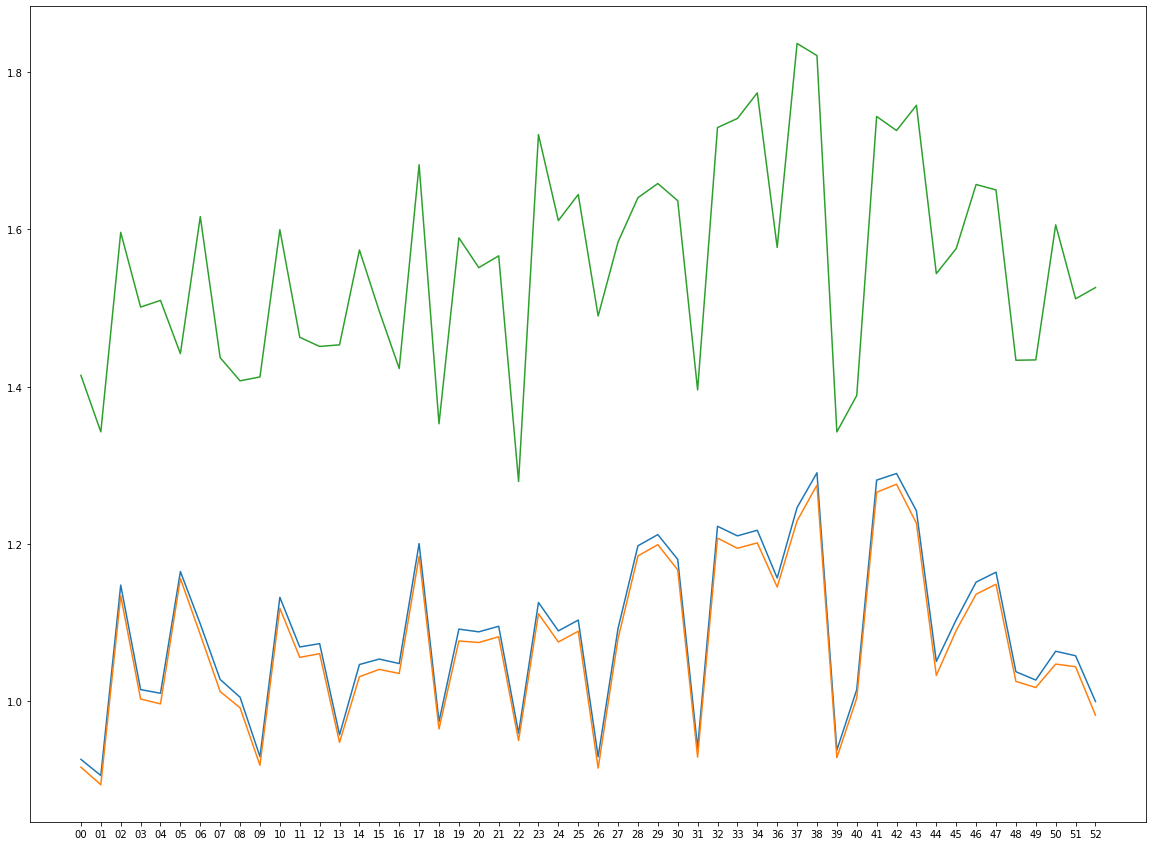

In [10]:
plt.plot(weighteraveragegraph)
plt.plot(averagedconventional)
plt.plot(averagedorganic)

In [11]:
regiondata = data2.groupby(data2['region'])
regiondata.last()

,Week,date,average_price,total_volume,gala,fuji,granny_smith,total_bags,s_bags,l_bags,xl_bags,type
region,,,,,,,,,,,,
Albany,11,2018-07-01,1.54,481690,4351,41217,0,436122,435789,333,0,organic
Atlanta,11,2018-07-01,1.53,1571411,40537,419519,0,1111355,788361,322994,0,organic
BaltimoreWashington,11,2018-07-01,1.15,8228271,131595,996210,13419,7087047,7086380,667,0,organic
Boise,11,2018-07-01,1.77,255390,4260,94908,0,156222,55206,101016,0,organic
Boston,11,2018-07-01,1.91,3009600,1446,270448,0,2737706,2512153,225553,0,organic
BuffaloRochester,11,2018-07-01,1.17,911592,28313,9007,0,874272,425019,449253,0,organic
California,11,2018-07-01,1.95,15634157,4299291,5600779,0,5734087,5727115,6972,0,organic
Charlotte,11,2018-07-01,1.08,2874111,2216,625459,22517,2223919,2213206,10713,0,organic
Chicago,11,2018-07-01,1.83,4157325,11884,2960036,0,1185405,1185072,333,0,organic


In [12]:
CountriesToExclude = ["TotalUS","West","Southeast","SouthCentral","Northeast","Midsouth","GreatLakes","California"]

In [13]:
countriesExcludedList = data2[~data2['region'].isin(CountriesToExclude)]

In [14]:

weighteraveragegraphA = countriesExcludedList.groupby([ countriesExcludedList['date'].dt.strftime('%W')]).apply(weighted_average ,'average_price', 'total_volume')


averagedconventionalA =  countriesExcludedList.where((countriesExcludedList['type']=="conventional"))
averagedconventionalA = averagedconventionalA.dropna()
averagedconventionalA = averagedconventionalA.groupby([ averagedconventionalA['date'].dt.strftime('%W')]).apply(weighted_average ,'average_price', 'total_volume')


averagedorganicA =  countriesExcludedList.where((countriesExcludedList['type']=="organic"))
averagedorganicA = averagedorganicA.dropna()
averagedorganicA = averagedorganicA.groupby([ averagedorganicA['date'].dt.strftime('%W')]).apply(weighted_average ,'average_price', 'total_volume')



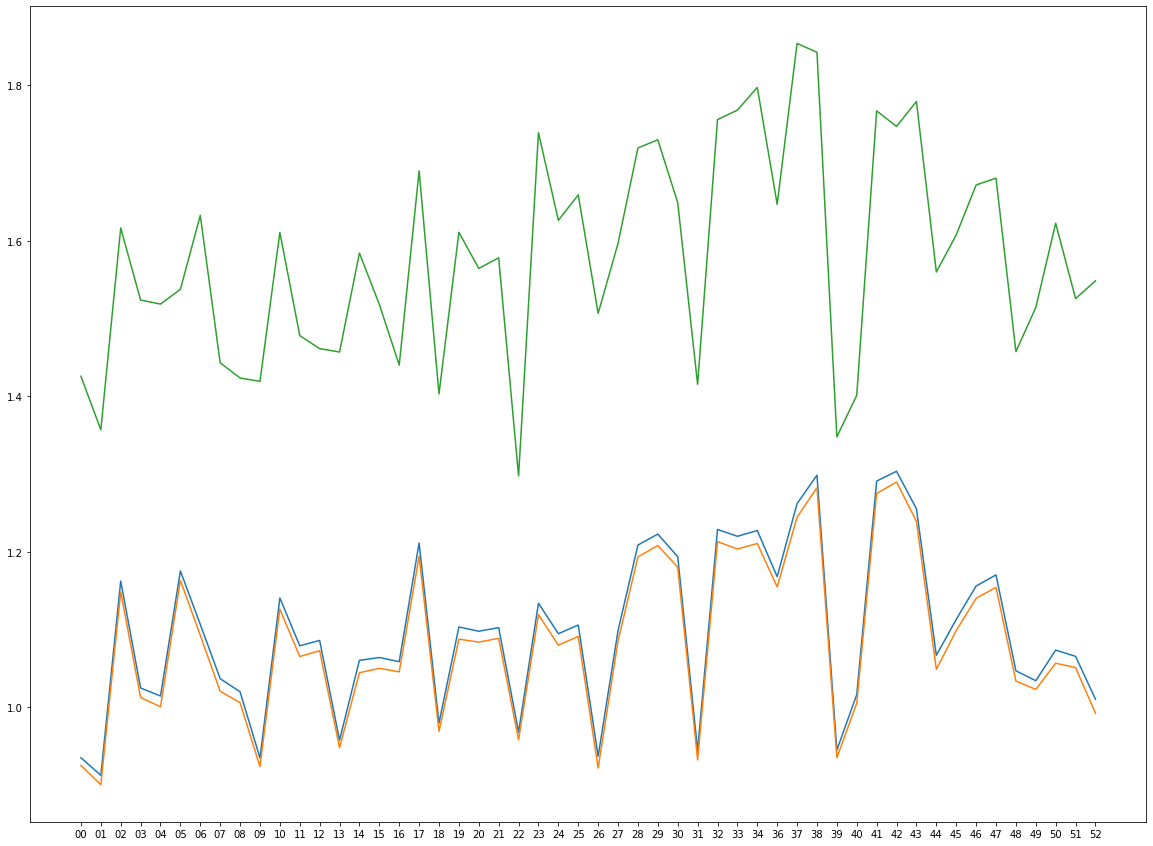

In [15]:
plt.plot(weighteraveragegraphA)
plt.plot(averagedconventionalA)
plt.plot(averagedorganicA)

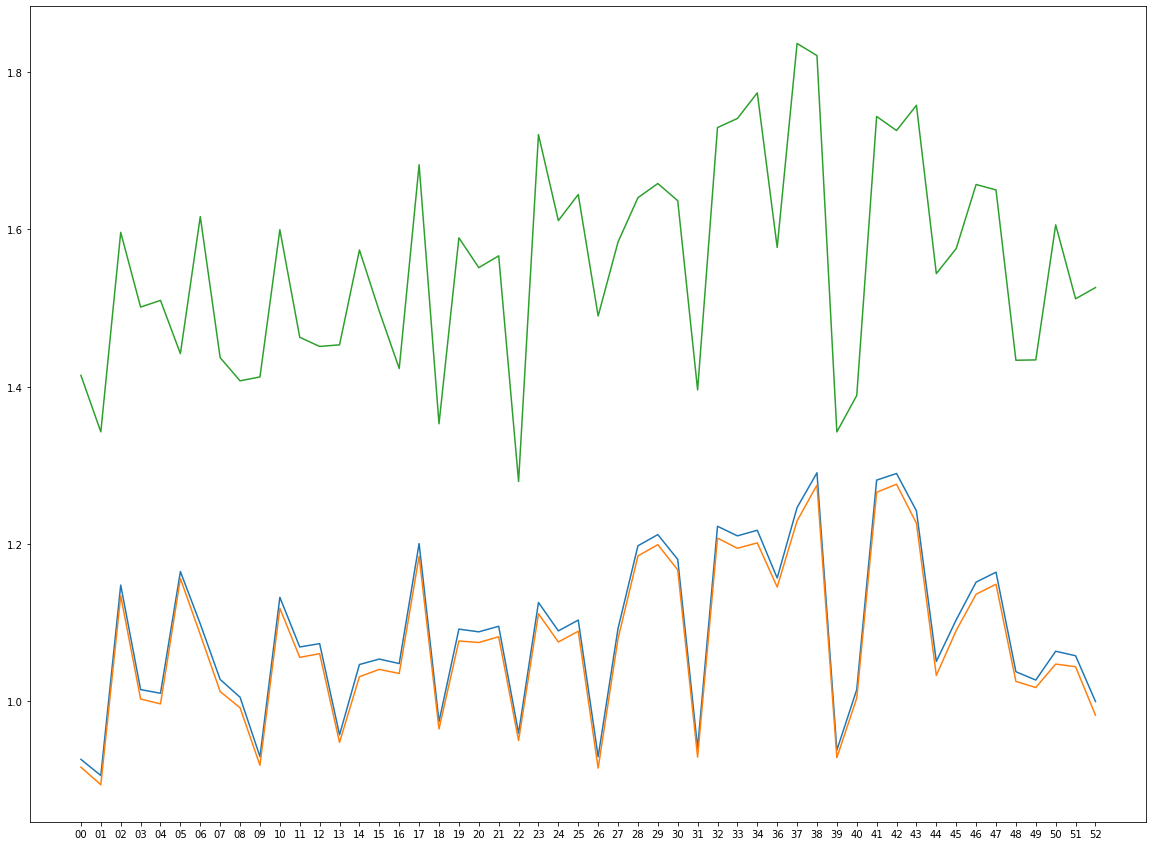

In [16]:
plt.plot(weighteraveragegraph)
plt.plot(averagedconventional)
plt.plot(averagedorganic)

In [23]:
productionall = countriesExcludedList.groupby([ countriesExcludedList['date'].dt.strftime('%W')])['total_volume'].sum()

productiongala = countriesExcludedList.groupby([ countriesExcludedList['date'].dt.strftime('%W')])['gala'].sum()

productionfuji = countriesExcludedList.groupby([ countriesExcludedList['date'].dt.strftime('%W')])['fuji'].sum()

productiongranny = countriesExcludedList.groupby([ countriesExcludedList['date'].dt.strftime('%W')])['granny_smith'].sum()


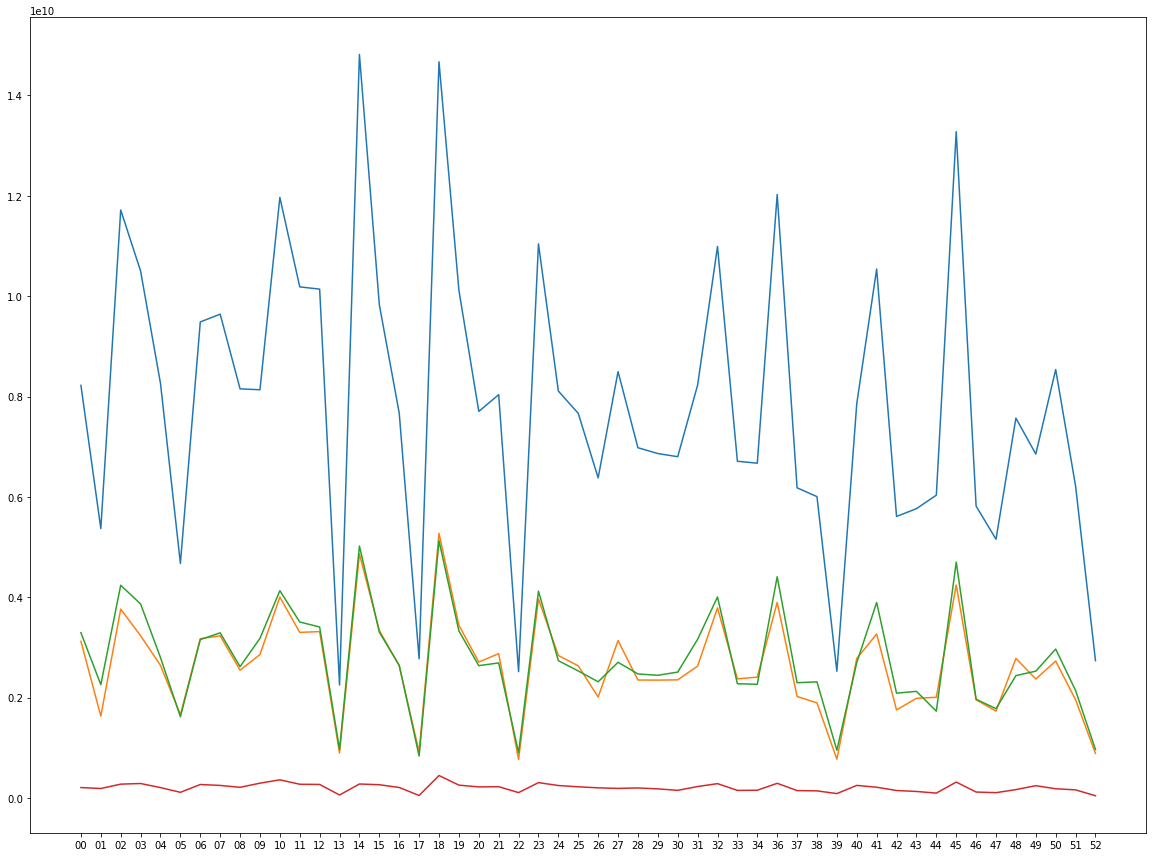

In [24]:
plt.plot(productionall )
plt.plot(productiongala)
plt.plot(productionfuji)
plt.plot(productiongranny)

<BarContainer object of 18249 artists>

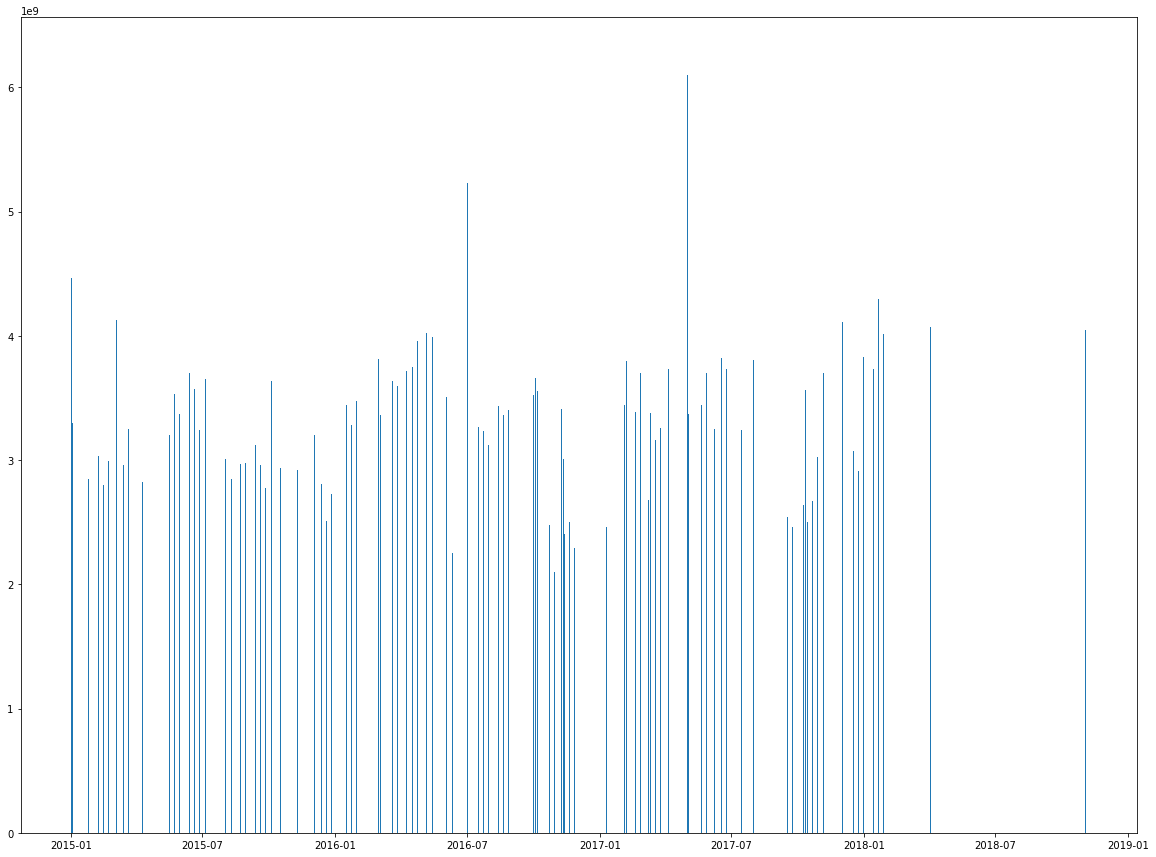

In [42]:
plt.bar(x=data2['date'],height=data2['total_volume'])

In [38]:
productionall.dtypes

dtype('int64')